# Human learning prediction model vs machine learning

I will try to predict price of the care manually and then will use machine learning and will compare the quality of results.

I m using the following datasets from Kaggle.

https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

https://drive.google.com/file/d/1k4Mymki8Rn7JIodvoG5qMNfr1pvaPZL5/view?usp=sharing

In [ ]:
! gdown --id 1k4Mymki8Rn7JIodvoG5qMNfr1pvaPZL5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1k4Mymki8Rn7JIodvoG5qMNfr1pvaPZL5
To: /content/used_cars_uk.zip
100% 1.15M/1.15M [00:00<00:00, 9.56MB/s]


In [ ]:
! unzip /content/used_cars_uk.zip

Archive:  /content/used_cars_uk.zip
  inflating: audi.csv                
  inflating: bmw.csv                 
  inflating: cclass.csv              
  inflating: focus.csv               
  inflating: ford.csv                
  inflating: hyundi.csv              
  inflating: merc.csv                
  inflating: skoda.csv               
  inflating: toyota.csv              
  inflating: unclean cclass.csv      
  inflating: unclean focus.csv       
  inflating: vauxhall.csv            
  inflating: vw.csv                  


## Data overview

In [ ]:
# importing necessary libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# removing the limit on the number of columns
pd.set_option('display.max_columns', None)

# removing the restriction on the width of columns
pd.set_option('display.max_colwidth', None)

# ignore warnings
pd.set_option('chained_assignment', None)

In [ ]:
#importing and looking at datasets
dfb=pd.read_csv('/content/bmw.csv')

In [ ]:
dfb.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
dfa=pd.read_csv('/content/audi.csv')

In [ ]:
dfa.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [ ]:
dff=pd.read_csv('/content/ford.csv')

In [ ]:
dff.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
dfh=pd.read_csv('/content/hyundi.csv')

In [ ]:
dfh.head(5)

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [ ]:
#renaming the column
dfh.rename(columns={'tax(£)':'tax'},inplace=True)

In [ ]:
# uniting all dataframes
df = pd.concat([
    dfa,dfb,dff,dfh])

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [ ]:
len(df)

44274

In [ ]:
df.isna().mean().sort_values(ascending=False)

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [ ]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [ ]:
df.rename(columns={'fuelType':'fuel','engineSize':'e_size'},inplace=True)

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [ ]:
df.model=df.model.str.lower()

In [ ]:
df.model.value_counts(dropna=False)

 fiesta             6557
 focus              4588
 3 series           2443
 kuga               2225
 1 series           1969
                    ... 
 transit tourneo       1
 escort                1
 accent                1
 ranger                1
 amica                 1
Name: model, Length: 89, dtype: int64

In [ ]:
df.year.value_counts(dropna=False)

2019    10962
2017     9722
2016     6893
2018     6713
2015     3621
2014     1938
2020     1866
2013     1377
2012      341
2011      211
2010      165
2009      157
2008      105
2007       70
2006       37
2005       30
2004       21
2003       14
2002       12
2000        4
1999        4
1998        3
2001        3
1997        2
1996        2
2060        1
Name: year, dtype: int64

In [ ]:
df.transmission.value_counts(dropna=False)

Manual       26024
Semi-Auto     9922
Automatic     8326
Other            2
Name: transmission, dtype: int64

In [ ]:
df.transmission=df.transmission.str.lower()

In [ ]:
df.fuel.value_counts(dropna=False)

Petrol      23560
Diesel      19974
Hybrid        697
Other          38
Electric        5
Name: fuel, dtype: int64

In [ ]:
df.fuel=df.fuel.str.lower()

## Data wrangling

In [ ]:
df.head(2)

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size
0,a1,2017,12500,manual,15735,petrol,150,55.4,1.4
1,a6,2016,16500,automatic,36203,diesel,20,64.2,2.0


In [ ]:
# excluding all cars below 2015 as there is not much data
df=df.query('2025 >year > 2015')

In [ ]:
# excluding hybrid,other,electric cars
df=df.query('fuel!="hybrid" and fuel!="other" and fuel!="electric"')

In [ ]:
# excluding othercars
df=df.query('transmission!="other"')

In [ ]:
# excluding othercars
df=df.query('e_size > 0')

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size
0,a1,2017,12500,manual,15735,petrol,150,55.4,1.4
1,a6,2016,16500,automatic,36203,diesel,20,64.2,2.0
2,a1,2016,11000,manual,29946,petrol,30,55.4,1.4
3,a4,2017,16800,automatic,25952,diesel,145,67.3,2.0
4,a3,2019,17300,manual,1998,petrol,145,49.6,1.0


## Human learning

Dividing our df into train and test.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df,train_size=0.6, random_state=42)
val, test = train_test_split(test,train_size=0.5, random_state=42)

In [ ]:
val, test = train_test_split(test,train_size=0.5, random_state=42)

In [ ]:
len(test)/len(df)

0.20001133048182873

In [ ]:
len(valid)/len(df)

0.20001133048182873

In [ ]:
train.head()

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size
1609,5 series,2016,15122,semi-auto,37390,diesel,20,68.9,2.0
5124,a1,2017,15490,manual,6950,petrol,145,56.5,1.4
2908,tucson,2017,13269,manual,15625,petrol,150,44.8,1.6
10597,x3,2017,22000,automatic,27385,diesel,145,54.3,2.0
840,4 series,2019,29990,semi-auto,10013,diesel,145,49.6,3.0


In [ ]:
plt.style.use('dark_background')

I analyze price behavior as it is prediction value.

<Axes: >

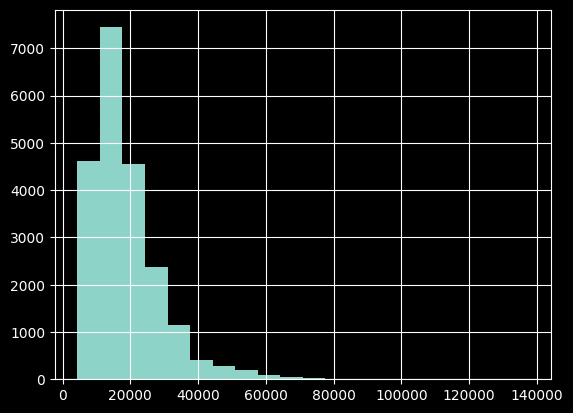

In [ ]:
train.price.hist(bins=20)

In [ ]:
train.price.describe()

count     21181.000000
mean      18918.800104
std       10314.272754
min        4388.000000
25%       11698.000000
50%       16450.000000
75%       22930.000000
max      137500.000000
Name: price, dtype: float64

In [ ]:
train.groupby('year')['price'].agg(['count','mean','median'])

,count,mean,median
year,,,
2016,4091,13970.637008,13100.0
2017,5741,14819.099286,13698.0
2018,3978,15923.969834,13995.0
2019,6320,25529.374367,23808.0
2020,1051,32157.547098,29990.0


<Axes: xlabel='year'>

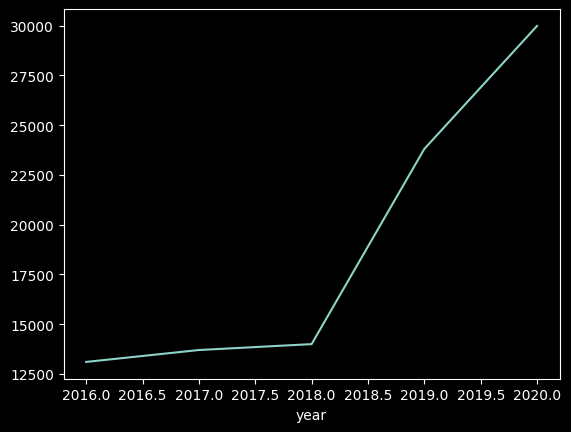

In [ ]:
train.groupby('year')['price'].median().plot()

### Baseline

I create baseline for as median of the price as we had different class models and there could be very expensive cars.

In [ ]:
# importing modules to calculate mistake
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# calculating median baseline price
train['price_pred_median']=train.price.median()

In [ ]:
train.head()

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size,price_pred_median
1609,5 series,2016,15122,semi-auto,37390,diesel,20,68.9,2.0,16450.0
5124,a1,2017,15490,manual,6950,petrol,145,56.5,1.4,16450.0
2908,tucson,2017,13269,manual,15625,petrol,150,44.8,1.6,16450.0
10597,x3,2017,22000,automatic,27385,diesel,145,54.3,2.0,16450.0
840,4 series,2019,29990,semi-auto,10013,diesel,145,49.6,3.0,16450.0


In [ ]:
def errors(a,b):
   print(mean_absolute_error(a,b))
   print(mean_absolute_percentage_error(a,b))

In [ ]:
errors(train['price'],train['price_pred_median'])

7077.631698220103
0.381713203709846


I check my median baseline prediction model on test sample.

In [ ]:
test['price_pred_median']=train.price.median()

In [ ]:
test

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size,price_pred_median
931,fiesta,2018,12500,manual,33095,petrol,145,65.7,1.0,16450.0
1621,x2,2019,26612,semi-auto,3000,petrol,150,38.7,2.0,16450.0
5866,kuga,2017,14998,manual,16595,petrol,145,45.6,1.5,16450.0
5832,3 series,2019,28999,automatic,11681,diesel,145,52.3,2.0,16450.0
294,a1,2017,12698,manual,11017,petrol,150,67.3,1.0,16450.0
...,...,...,...,...,...,...,...,...,...,...
6112,kuga,2018,18998,manual,7395,petrol,150,39.2,1.5,16450.0
1049,4 series,2016,16807,automatic,39218,diesel,30,65.7,2.0,16450.0
7572,a5,2019,25871,automatic,14649,petrol,145,39.8,2.0,16450.0
4757,focus,2019,21972,manual,1011,petrol,145,60.1,1.0,16450.0


In [ ]:
errors(test['price'],test['price_pred_median'])

7084.091771703725
0.38549883075678976


Median baseline gives 39 percent error on test sample.

### Year Algorythm

In [ ]:
#grouping by year
train.groupby('year')['price'].agg(['count','median'])

,count,median
year,,
2016,4091,13100.0
2017,5741,13698.0
2018,3978,13995.0
2019,6320,23808.0
2020,1051,29990.0


In [ ]:
model_year_median=train.groupby('year')['price'].median().reset_index()

In [ ]:
model_year_median

,year,price
0,2016,13100.0
1,2017,13698.0
2,2018,13995.0
3,2019,23808.0
4,2020,29990.0


In [ ]:
#changing names of columns
model_year_median.columns=['year', 'price_pred_year_median']

In [ ]:
train=train.merge(model_year_median,how='left',on='year')

In [ ]:
train.head(2)

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size,price_pred_median,price_pred_year_median
0,5 series,2016,15122,semi-auto,37390,diesel,20,68.9,2.0,16450.0,13100.0
1,a1,2017,15490,manual,6950,petrol,145,56.5,1.4,16450.0,13698.0


In [ ]:

errors(train['price'],train['price_pred_year_median'])

5748.048958972664
0.31007413978524995


In [ ]:
# checking on test sample
test=test.merge(model_year_median,how='left',on='year')

In [ ]:
test.head(2)

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size,price_pred_median,price_pred_year_median
0,fiesta,2018,12500,manual,33095,petrol,145,65.7,1.0,16450.0,13995.0
1,x2,2019,26612,semi-auto,3000,petrol,150,38.7,2.0,16450.0,23808.0


In [ ]:
errors(test['price'],test['price_pred_year_median'])

5699.151819855544
0.31142909986670586


Year median prediction model is much better than just median - 31 percent.

### Year model + transmission model

In [ ]:
train.groupby(['year','transmission'])['price'].agg(['count','median'])

count   median
year transmission                
2016 automatic       763  15999.0
     manual         2557  10998.0
     semi-auto       771  18291.0
2017 automatic       746  18370.0
     manual         3849  11490.0
     semi-auto      1146  19498.0
2018 automatic       417  19500.0
     manual         2878  12495.0
     semi-auto       683  21980.0
2019 automatic      1598  29000.0
     manual         2644  17295.0
     semi-auto      2078  27994.5
2020 automatic       135  34990.0
     manual          312  20985.0
     semi-auto       604  32995.0

In [ ]:
model_year_trans_median=train.groupby(['year','transmission'])['price'].median().reset_index()

In [ ]:
model_year_trans_median

,year,transmission,price
0,2016,automatic,15999.0
1,2016,manual,10998.0
2,2016,semi-auto,18291.0
3,2017,automatic,18370.0
4,2017,manual,11490.0
5,2017,semi-auto,19498.0
6,2018,automatic,19500.0
7,2018,manual,12495.0
8,2018,semi-auto,21980.0
9,2019,automatic,29000.0


In [ ]:
#changing names of columns
model_year_trans_median.columns=['year','transmission','price_pred_year_trans_median']

In [ ]:
train=train.merge(model_year_trans_median,how='left',on=['year','transmission'])

In [ ]:
train

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size,price_pred_median,price_pred_year_median,price_pred_year_trans_median
0,5 series,2016,15122,semi-auto,37390,diesel,20,68.9,2.0,16450.0,13100.0,18291.0
1,a1,2017,15490,manual,6950,petrol,145,56.5,1.4,16450.0,13698.0,11490.0
2,tucson,2017,13269,manual,15625,petrol,150,44.8,1.6,16450.0,13698.0,11490.0
3,x3,2017,22000,automatic,27385,diesel,145,54.3,2.0,16450.0,13698.0,18370.0
4,4 series,2019,29990,semi-auto,10013,diesel,145,49.6,3.0,16450.0,23808.0,27994.5
...,...,...,...,...,...,...,...,...,...,...,...,...
21176,x1,2016,14700,manual,21876,diesel,125,60.1,2.0,16450.0,13100.0,10998.0
21177,a6,2018,20990,semi-auto,32978,petrol,145,47.9,1.8,16450.0,13995.0,21980.0
21178,1 series,2016,14480,semi-auto,37529,diesel,20,68.9,1.5,16450.0,13100.0,18291.0
21179,q2,2019,21756,manual,3486,petrol,145,45.6,1.0,16450.0,23808.0,17295.0


In [ ]:
errors(train['price'],train['price_pred_year_trans_median'])

4459.220102922431
0.23323536774760187


In [ ]:
test=test.merge(model_year_trans_median,how='left',on=['year','transmission'])

In [ ]:
test

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size,price_pred_median,price_pred_year_median,price_pred_year_trans_median
0,fiesta,2018,12500,manual,33095,petrol,145,65.7,1.0,16450.0,13995.0,12495.0
1,x2,2019,26612,semi-auto,3000,petrol,150,38.7,2.0,16450.0,23808.0,27994.5
2,kuga,2017,14998,manual,16595,petrol,145,45.6,1.5,16450.0,13698.0,11490.0
3,3 series,2019,28999,automatic,11681,diesel,145,52.3,2.0,16450.0,23808.0,29000.0
4,a1,2017,12698,manual,11017,petrol,150,67.3,1.0,16450.0,13698.0,11490.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7056,kuga,2018,18998,manual,7395,petrol,150,39.2,1.5,16450.0,13995.0,12495.0
7057,4 series,2016,16807,automatic,39218,diesel,30,65.7,2.0,16450.0,13100.0,15999.0
7058,a5,2019,25871,automatic,14649,petrol,145,39.8,2.0,16450.0,23808.0,29000.0
7059,focus,2019,21972,manual,1011,petrol,145,60.1,1.0,16450.0,23808.0,17295.0


In [ ]:
errors(test['price'],test['price_pred_year_trans_median'])

4427.781546523155
0.23371830072890212


So for this model I have best 23 percent result.

### Year+transmission+engine size model

In [ ]:
#putting engine size into groups
def e_group (x):
  if x<=1.5:
    return '<=1.5'
  if x<=2:
    return '<=2'
  return '>2'

In [ ]:
# creating column with engine group
train['engine_group']=train.e_size.apply(e_group)

In [ ]:
# creating prediction model
model_year_trans_engine_median=\
      train.groupby(['year','transmission','engine_group'])['price'].median().reset_index()

In [ ]:
model_year_trans_engine_median

,year,transmission,engine_group,price
0,2016,automatic,<=1.5,11642.5
1,2016,automatic,<=2,15800.0
2,2016,automatic,>2,20990.0
3,2016,manual,<=1.5,9495.0
4,2016,manual,<=2,13799.0
5,2016,manual,>2,17390.0
6,2016,semi-auto,<=1.5,12895.5
7,2016,semi-auto,<=2,17600.0
8,2016,semi-auto,>2,22880.0
9,2017,automatic,<=1.5,13820.0


In [ ]:
#renaming the row
model_year_trans_engine_median=\
      model_year_trans_engine_median.rename({'price':'price_pred_year_trans_engine_median'},axis=1)

In [ ]:
#predicting price
train=train.merge(model_year_trans_engine_median,how='left',on=['year','transmission','engine_group'])

In [ ]:
train.head(2)

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size,price_pred_median,price_pred_year_median,price_pred_year_trans_median,engine_group,price_pred_year_trans_engine_median
0,5 series,2016,15122,semi-auto,37390,diesel,20,68.9,2.0,16450.0,13100.0,18291.0,<=2,17600.0
1,a1,2017,15490,manual,6950,petrol,145,56.5,1.4,16450.0,13698.0,11490.0,<=1.5,10300.0


In [ ]:
# calculating error for train dataset
errors(train['price'],train['price_pred_year_trans_engine_median'])

3289.6285822199143
0.17813334249715343


In [ ]:
# creating engine group column for test dataset
test['engine_group']=test.e_size.apply(e_group)

In [ ]:
# predicting prices
test=test.merge(model_year_trans_engine_median,how='left',on=['year','transmission','engine_group'])

In [ ]:
# calculating error for test dataset
errors(test['price'],test['price_pred_year_trans_engine_median'])

3330.3479677099563
0.18348600721526942


My best result is 17 percent for train group and 18 for test group.

## Machine learning

For machine learning I ll use catboost from yandex.

In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00


In [ ]:
# importing regressor
from catboost import CatBoostRegressor

In [ ]:
# creating train test and validation model
train, test = train_test_split(df,train_size=0.6, random_state=42)
val, test = train_test_split(test,train_size=0.5, random_state=42)

In [ ]:
# defining parameters based on what I  calculated manually: the same
x=['year', 'transmission', 'e_size']
cat_features=['transmission']
y=['price']

In [ ]:
model=CatBoostRegressor(cat_features=cat_features,eval_metric='MAPE')

In [ ]:
#creating the model
model.fit(train[x],train[y],eval_set=(val[x],val[y]),verbose=100)

Learning rate set to 0.082237
0:	learn: 0.4271482	test: 0.4287378	best: 0.4287378 (0)	total: 57.8ms	remaining: 57.7s
100:	learn: 0.1451964	test: 0.1480093	best: 0.1480091 (99)	total: 2.15s	remaining: 19.2s
200:	learn: 0.1420971	test: 0.1451104	best: 0.1451104 (200)	total: 2.9s	remaining: 11.5s
300:	learn: 0.1412755	test: 0.1446036	best: 0.1446036 (300)	total: 3.61s	remaining: 8.38s
400:	learn: 0.1409759	test: 0.1445369	best: 0.1445107 (352)	total: 4.32s	remaining: 6.45s
500:	learn: 0.1407342	test: 0.1443736	best: 0.1443709 (496)	total: 5s	remaining: 4.98s
600:	learn: 0.1404484	test: 0.1441707	best: 0.1441639 (583)	total: 5.69s	remaining: 3.78s
700:	learn: 0.1402413	test: 0.1440020	best: 0.1439963 (697)	total: 6.51s	remaining: 2.78s
800:	learn: 0.1400895	test: 0.1438339	best: 0.1438326 (798)	total: 8.2s	remaining: 2.04s
900:	learn: 0.1399710	test: 0.1437080	best: 0.1437036 (898)	total: 9.4s	remaining: 1.03s
999:	learn: 0.1398706	test: 0.1436441	best: 0.1436280 (985)	total: 10s	remaining

Model train MAPE mistake is 14 percent.

In [ ]:
# predicting prices
test['price_pred']=model.predict(test[x])

In [ ]:
def errors(a,b):
   print(mean_absolute_error(a,b))
   print(mean_absolute_percentage_error(a,b))

In [ ]:
# calculating errors on price
errors(test['price'],test['price_pred'])

2601.4022878829287
0.14137896960267402


My best result is 18%, ML model has best result on same dataset is 14%.